In [176]:
import pandas as pd
import datetime
import seaborn as sns
import math

In [188]:
dfCSV = pd.read_csv('data/BTCUSDT_Binance_futures_data_day.csv')

In [189]:
# Week starts on sunday because english people are weird 
volume = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
weekControl= [0,0,0,0,0,0,0]

for row in dfCSV.itertuples(index=False, name='BTCPrice'):
#     if  math.isnan(row.tradecount):
#         break
#         print(weekday)
#         print(row.tradecount)
    if (row.unix/1000) < 1578265200:
        break
    
    weekday = datetime.datetime.fromtimestamp(row.unix/1000).weekday()
    volume[weekday][0] += row.VolumeUSDT
    volume[weekday][1] += row.VolumeBTC
    weekControl[weekday] += 1
    volume[weekday][2] += float(row.tradecount)
    
volumeDf = pd.DataFrame (data= volume,columns=['volumeUSDT', 'volumeBTC', 'tradecount'])
volumeDf['day'] = ['Monday','Tuesday','Thursday', 'Wednesday', 'Friday', 'Saturday', 'Sunday']

print(volumeDf)
print(weekControl)

     volumeUSDT     volumeBTC   tradecount        day
0  4.114016e+11  2.077336e+07  102194246.0     Monday
1  3.988819e+11  1.943634e+07   98730797.0    Tuesday
2  4.311866e+11  2.072247e+07  103262700.0   Thursday
3  4.335761e+11  2.275697e+07  106722357.0  Wednesday
4  3.892004e+11  1.913103e+07   98458237.0     Friday
5  3.187673e+11  1.485675e+07   81151811.0   Saturday
6  3.403878e+11  1.610417e+07   86444562.0     Sunday
[67, 67, 67, 67, 67, 67, 67]


In [190]:
sns.set_style("darkgrid")
flatui = ["#4f6d7a","#f19a3e","#69995D","#4a6fa5","#166088","#e27396","#6e4555"]
sns.set_palette(flatui)

In [191]:
sum(weekControl)

469

[Text(0.5, 0, 'Volume (in USDT)'),
 Text(0, 0.5, 'Days'),
 Text(0.5, 1.0, 'Traded Volume in USDT for Binance:BTCUSDT Futures (sample size: 469 days)')]

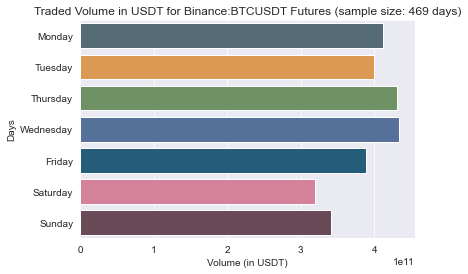

In [195]:
ax= sns.barplot(data = volumeDf
            , y= 'day'
            , x= 'volumeUSDT', palette=sns.color_palette())
ax.set(xlabel='Volume (in USDT)', ylabel='Days', title='Traded Volume in USDT for Binance:BTCUSDT Futures (sample size: 469 days)')

[Text(0.5, 0, 'Volume (in BTC)'),
 Text(0, 0.5, 'Days'),
 Text(0.5, 1.0, 'Traded Volume in BTC for Binance:BTCUSDT Futures (sample size: 469 days)')]

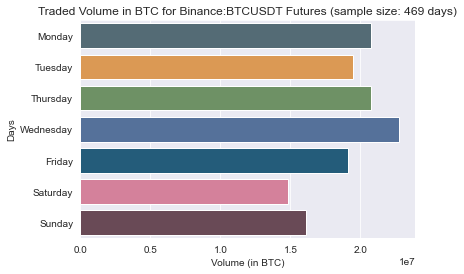

In [196]:
ax = sns.barplot(data = volumeDf
            , y= 'day'
            , x= 'volumeBTC', palette=sns.color_palette())
ax.set(xlabel='Volume (in BTC)', ylabel='Days', title='Traded Volume in BTC for Binance:BTCUSDT Futures (sample size: 469 days)')

[Text(0.5, 0, 'Trade Count'),
 Text(0, 0.5, 'Days'),
 Text(0.5, 1.0, 'Trade Count for Binance:BTCUSDT Futures (sample size: 469 days)')]

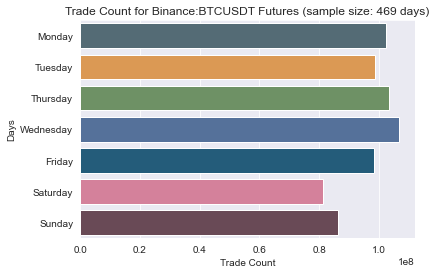

In [197]:
ax = sns.barplot(data = volumeDf
            , y= 'day'
            , x= 'tradecount', palette=sns.color_palette())
ax.set(xlabel='Trade Count', ylabel='Days', title='Trade Count for Binance:BTCUSDT Futures (sample size: 469 days)')